# Import Libraries

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

#  Initialize Empty List

In [5]:
titles, prices, ratings = [], [], []

# Loop Through Pages and Scrape Book Data

In [7]:
for page in range(1, 6):  # scraping first 5 pages
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    books = soup.find_all("article", class_="product_pod")
    for book in books:
        title = book.h3.a['title']
        price = float(book.find("p", class_="price_color").text[2:])
        rating = book.p['class'][1]

        titles.append(title)
        prices.append(price)
        ratings.append(rating)


# Create DataFrame and Export CSV

In [9]:
df = pd.DataFrame({
    "Title": titles,
    "Price (£)": prices,
    "Rating": ratings})

# Save to CSV
df.to_csv("books_scraped.csv", index=False)

# Preview first 5 rows
df.head()


,Title,Price (£),Rating
0,A Light in the Attic,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History of Humankind,54.23,Five


# Plot Price Distribution

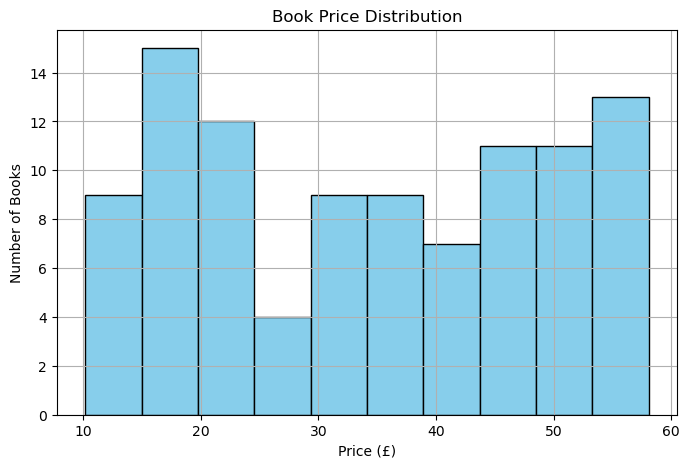

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(df["Price (£)"], bins=10, color='skyblue', edgecolor='black')
plt.title("Book Price Distribution")
plt.xlabel("Price (£)")
plt.ylabel("Number of Books")
plt.grid(True)
plt.show()


# Insights
- Scraped 100 books across 5 pages.

- Most books cost between £20–£40.

- "Three" is the most common rating.